# Comcast Telecom Consumer Complaints Project

**1.Import the required libraries**

In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
from bs4 import BeautifulSoup
import datetime
from datetime import date

**2. Load the data from the csv file**

In [164]:
df = pd.read_csv("Comcast_telecom_complaints_data.csv")

In [165]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [166]:
# Review all the columns in the dataset
df.columns

Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone'],
      dtype='object')

In [167]:
# Change the column name Ticket # to Ticket_No
df = df.rename(columns={'Ticket #': 'Ticket_No'}) 

In [168]:
df.head()

,Ticket_No,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


**3. View the unique values in Status column and change status 'Open' & 'Pending' to be categorized as 'Open' and 'Closed' & 'Solved' to be categorized as 'Closed'**

In [169]:
df.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [170]:
df.Status.replace(('Closed', 'Open', 'Solved', 'Pending'),('Closed', 'Open','Closed', 'Open'),inplace=True)

In [171]:
df.Status.unique()

array(['Closed', 'Open'], dtype=object)

In [172]:
df['Customer Complaint'].unique()

array(['Comcast Cable Internet Speeds',
       'Payment disappear - service got disconnected',
       'Speed and Service', ..., 'complaint about comcast',
       'Extremely unsatisfied Comcast customer',
       'Comcast, Ypsilanti MI Internet Speed'], dtype=object)

In [173]:
df.columns

Index(['Ticket_No', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone'],
      dtype='object')

**4. Check all the columns to see if there any null value**

In [174]:
df.isnull().sum().sort_values(ascending=False)

Ticket_No                      0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

No Null values found in any column

In [175]:
df.dtypes

Ticket_No                      object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

**5. Add Date Month year with Time and save it into df_index column**

In [176]:
df['df_index'] = df['Date_month_year'] + ' ' + df['Time']

In [177]:
df['df_index']

0        22-Apr-15 3:53:50 PM
1       04-Aug-15 10:22:56 AM
2        18-Apr-15 9:55:47 AM
3       05-Jul-15 11:59:35 AM
4        26-May-15 1:25:26 PM
                ...          
2219     04-Feb-15 9:13:18 AM
2220     06-Feb-15 1:24:39 PM
2221     06-Sep-15 5:28:41 PM
2222    23-Jun-15 11:13:30 PM
2223    24-Jun-15 10:28:33 PM
Name: df_index, Length: 2224, dtype: object

In [178]:
#Convert Date_index and Date_month_year to Datetime Format
df['df_index'] = pd.to_datetime(df['df_index'])
df['Date_month_year'] = pd.to_datetime(df['Date_month_year'])

#Set df_index as index to dataset in dataframe df_monthly
df_monthly = df.set_index(df['df_index'])

In [179]:
df['Date_month_year']

0      2015-04-22
1      2015-08-04
2      2015-04-18
3      2015-07-05
4      2015-05-26
          ...    
2219   2015-02-04
2220   2015-02-06
2221   2015-09-06
2222   2015-06-23
2223   2015-06-24
Name: Date_month_year, Length: 2224, dtype: datetime64[ns]

In [180]:
df['df_index']

0      2015-04-22 15:53:50
1      2015-08-04 10:22:56
2      2015-04-18 09:55:47
3      2015-07-05 11:59:35
4      2015-05-26 13:25:26
               ...        
2219   2015-02-04 09:13:18
2220   2015-02-06 13:24:39
2221   2015-09-06 17:28:41
2222   2015-06-23 23:13:30
2223   2015-06-24 22:28:33
Name: df_index, Length: 2224, dtype: datetime64[ns]

In [181]:
df_monthly.head()

,Ticket_No,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,df_index
df_index,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Closed,No,2015-05-26 13:25:26


**6. Group tickets my monthly and plot trend chart for the number of complaints at monthly and daily granularity levels**

In [182]:
df_monthly_tickets = df_monthly.groupby(pd.Grouper(freq='M')).count()

Text(0, 0.5, 'No. of Tickets')

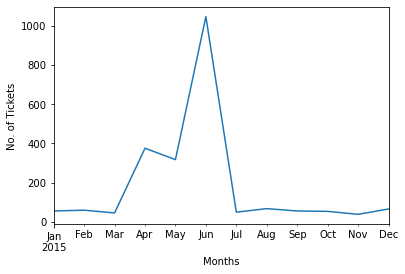

In [183]:
df_monthly_tickets.Ticket_No.plot()
plt.xlabel('Months')
plt.ylabel('No. of Tickets')

In [184]:
df['Day of Month'] = pd.to_datetime(df['Date'])
df_daily = df.set_index(df["Day of Month"])
df_daily_tickets = df_daily.groupby(pd.Grouper(freq='D')).count()

Text(0, 0.5, 'No. of Tickets')

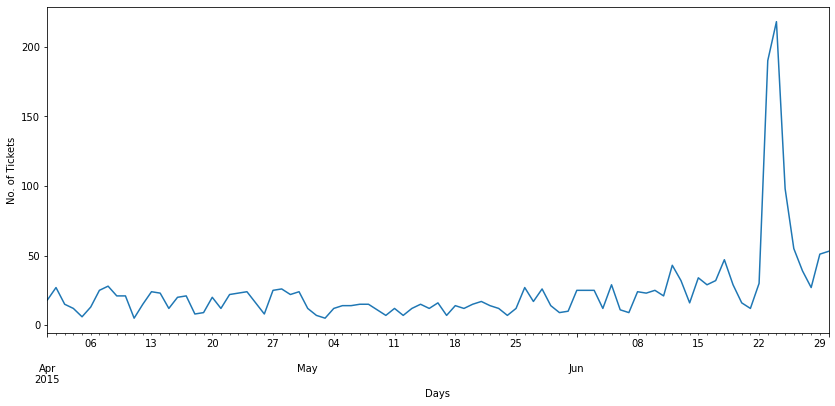

In [185]:
plt.figure(figsize=(14,6))
df_daily_tickets.Ticket_No.plot()
plt.xlabel('Days')
plt.ylabel('No. of Tickets')

**7. Plot state wise status of complaints in a stacked bar chart for Q3**

In [186]:
df_Q3 = df_monthly[(df_monthly['Date_month_year']> '2015-06-30')& (df_monthly['Date_month_year'] <'2015-10-01')]

In [187]:
df_Q3

,Ticket_No,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,df_index
df_index,,,,,,,,,,,,
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35
2015-07-06 20:55:43,327657,Internet out all the time but they have a mono...,06-07-15,2015-07-06,8:55:43 PM,Customer Care Call,Alexandria,Virginia,22305,Closed,No,2015-07-06 20:55:43
2015-08-06 15:18:58,328742,horrible cable service and customer service,06-08-15,2015-08-06,3:18:58 PM,Internet,Alexandria,Virginia,22312,Closed,No,2015-08-06 15:18:58
2015-08-06 12:03:37,328165,Speed,06-08-15,2015-08-06,12:03:37 PM,Customer Care Call,Alexandria,Virginia,22304,Closed,No,2015-08-06 12:03:37
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-04 18:57:54,222759,monopolistic billing practices,04-07-15,2015-07-04,6:57:54 PM,Customer Care Call,Winnetka,Illinois,60093,Closed,No,2015-07-04 18:57:54
2015-08-06 18:17:50,329247,Inconsistent and Intermittent Internet Connect...,06-08-15,2015-08-06,6:17:50 PM,Internet,Woodstock,Georgia,30188,Closed,No,2015-08-06 18:17:50
2015-07-05 21:47:36,279410,False Advertising/Bait and switch,05-07-15,2015-07-05,9:47:36 PM,Customer Care Call,Worth,Illinois,60482,Closed,No,2015-07-05 21:47:36


<AxesSubplot:xlabel='count', ylabel='State'>

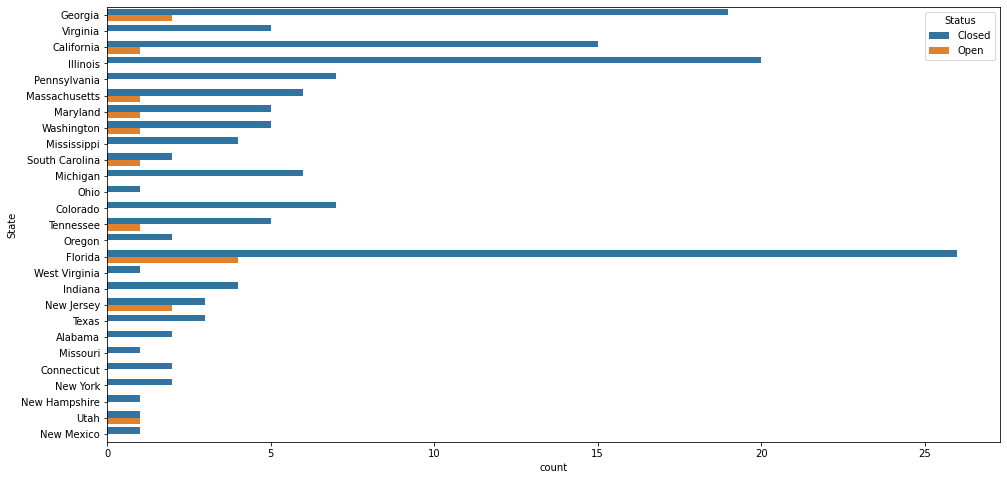

In [188]:
plt.figure(figsize=(16,8))
sns.countplot (y='State',hue = "Status", data= df_Q3)

**8.Construct a table with the frequency of complaint types**

In [195]:
df_monthly['Customer Complaint'].value_counts()

Comcast                                          83
Comcast Internet                                 18
Comcast Data Cap                                 17
comcast                                          13
Comcast Billing                                  11
                                                 ..
Improper Billing and non resolution of issues     1
Deceptive trade                                   1
intermittent internet                             1
Internet Speed on Wireless Connection             1
Comcast, Ypsilanti MI Internet Speed              1
Name: Customer Complaint, Length: 1841, dtype: int64

In [198]:
#  Convert all data into uper case or sentence case so duplicate value will shorted
df['Customer Complaint'].str.upper().value_counts()

COMCAST                                                            102
COMCAST DATA CAP                                                    30
COMCAST INTERNET                                                    29
COMCAST DATA CAPS                                                   21
COMCAST BILLING                                                     18
                                                                  ... 
MONTHLY DATA CAPS                                                    1
COMCAST/XFINITY POOR SERVICE, FRAUDULENT BILLING AND COLLECTION      1
LOST EMAILS/BILLING                                                  1
IMPROPER BILLING AND NON RESOLUTION OF ISSUES                        1
COMCAST, YPSILANTI MI INTERNET SPEED                                 1
Name: Customer Complaint, Length: 1740, dtype: int64

**9. Get the list of state wise complaints and see which state has maximum complaints**

In [203]:
df_monthly.groupby('State')['Customer Complaint'].count()

State
Alabama                  26
Arizona                  20
Arkansas                  6
California              220
Colorado                 80
Connecticut              12
Delaware                 12
District Of Columbia     16
District of Columbia      1
Florida                 240
Georgia                 288
Illinois                164
Indiana                  59
Iowa                      1
Kansas                    2
Kentucky                  7
Louisiana                13
Maine                     5
Maryland                 78
Massachusetts            61
Michigan                115
Minnesota                33
Mississippi              39
Missouri                  4
Montana                   1
Nevada                    1
New Hampshire            12
New Jersey               75
New Mexico               15
New York                  6
North Carolina            3
Ohio                      3
Oregon                   49
Pennsylvania            130
Rhode Island              1
South Carolina

In [204]:
df_monthly.groupby('State')['Customer Complaint'].count().max()

288

Georgia has the maximum complaints

**10. Group by states and see no of Open and Closed customer complaints**

In [100]:
df_monthly.groupby(['State','Status'])['Ticket_No'].count()

State          Status
Alabama        Closed    17
               Open       9
Arizona        Closed    14
               Open       6
Arkansas       Closed     6
                         ..
Virginia       Open      11
Washington     Closed    75
               Open      23
West Virginia  Closed     8
               Open       3
Name: Ticket_No, Length: 77, dtype: int64

In [101]:
df_complaints = df_monthly.groupby(['State','Status'])['Ticket_No'].count()

In [104]:
pd.crosstab(df_monthly.State,df_monthly.Status)

Status,Closed,Open
State,,
Alabama,17,9
Arizona,14,6
Arkansas,6,0
California,159,61
Colorado,58,22
Connecticut,9,3
Delaware,8,4
District Of Columbia,14,2
District of Columbia,1,0


**11. Calculate the percentage of complaints resolved till date, which were received through the Internet and customer care calls**

In [208]:
df_percent["Percentage"] = df_percent['Open']/(df_percent['Open']+df_percent['Closed'])*100

In [209]:
df_percent

Status,Closed,Open,Percentage
State,,,
Alabama,17,9,34.615385
Arizona,14,6,30.000000
Arkansas,6,0,0.000000
California,159,61,27.727273
Colorado,58,22,27.500000
Connecticut,9,3,25.000000
Delaware,8,4,33.333333
District Of Columbia,14,2,12.500000
District of Columbia,1,0,0.000000


In [121]:
df_percent['Percentage'].max()

50.0

In [212]:
df_percent['Open'].max()

80

Kansas has the heighest percentage of Unresolved complaints while Georgia has the heighest no. of unresolved complaints

**12. Plot the percentage of complaints resolved till date, which were received through the Internet and customer care calls**

In [117]:
df_monthly['Received Via'].unique()

array(['Customer Care Call', 'Internet'], dtype=object)

All the complaints were received from Customer care call and Internet

In [122]:
df_monthly.Status.value_counts()

Closed    1707
Open       517
Name: Status, dtype: int64

<AxesSubplot:title={'center':'Complaints Status through the Internet & Customer Care Calls'}, ylabel='Status'>

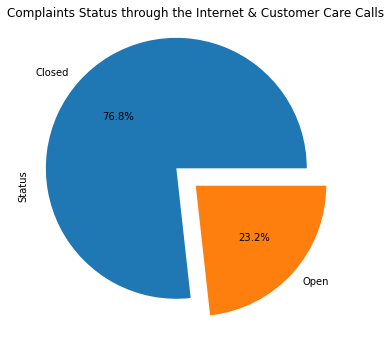

In [124]:
myexplode = [0.2, 0]
plt.title('Complaints Status through the Internet & Customer Care Calls')
df_monthly.Status.value_counts().plot(kind='pie',explode = myexplode,autopct='%1.1f%%',figsize = (14,6))